In [2]:
#Example of How I gather the HDF Files and how we can map the data

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import numpy as np
import h5py

In [4]:
from datetime import datetime
import datetime as dt
from datetime import date, timedelta as td
from datetime import date as ab
import time
from time import strftime, localtime
###I want to set a start date and an end date, so will update you on the date stuff
import glob 

In [5]:
#curDT = dt.datetime(2004,10,1,19,52)
#endDT = dt.datetime(2004,12,31,19,52)
curDT = date(2004,10,1)
endDT = date(2004,12,31)
### It starts from Dec 1, 2013 and ends at Dec 1, 2014 at whatever times. Will make it simple to parse into times.
good = 0
bad = 0
i=1

In [6]:
while curDT < endDT:
    year = curDT.strftime("%Y")
    ### We will take advantage of glob.glob to find files with similar naming patterns, makes lyfe much easier innit.
    file = glob.glob("OMI-Aura_L2G-OMCLDO2G_" + curDT.strftime("%Ym%m%d")+"*")
    #print("homes/metogra/jeun/OMI-Aura_L2-OMTO3_" + curDT.strftime("%Ym%m%d")+"*")
    
    try:
        f = h5py.File(file[0],mode='r')
        good += 1
        #at = f['HDFEOS/SWATHS/OMI Column Amount O3/Geolocation Fields/Latitude'][:,:]
        #on = f['HDFEOS/SWATHS/OMI Column Amount O3/Geolocation Fields/Longitude'][:,:]
        cfrac = f['HDFEOS/GRIDS/CloudFractionAndPressure/Data Fields/CloudFraction'][:,:]
        cfrac = np.ma.masked_where(cfrac == -1.2676506E30,cfrac)
        #print(cfrac)
        avg = np.average(cfrac)
        #print(curDT, avg)
        print(avg)
        #print(curDT)
        
        #plt.plot(curDT, avg)
        #plt.show()
        
    except:
        bad += 1
        ###pass
        #EndYear=curDT.strftime("%Y")
    curDT = curDT + td(days=1)
    i+=1



0.3105074455276701
0.3005577672777363
0.35587283398406055
0.2862491528926278
0.31801126689678727
0.42031713571988355
0.30398768304822554
0.26355322607149145
0.2389724235241381
0.2977707617613442
0.27014849632170956
0.29598092599478726
0.2848440882119263
0.28333561334428026
0.2857006991858428
0.34757021776167046
0.291256150075578
0.32478512478182064
0.28682738403087205
0.3580253465606274
0.3368166557005307
0.2983425540144871
0.28807866054458375
0.27935120654748974
0.3210324981508876
0.3092250364336647
0.32975627598903423
0.28700958920488645
0.3018646714741365
0.29820704698455913
0.2742795293091933
0.3269636626087501
0.2227327774091296
0.26797235970826844
0.2727556358227518
0.370628724092146
0.31141626768955644
0.30574270219313454
0.29744083382641756
0.26853663050672005
0.29644719707177597
0.26534185330606747
0.30344387994525746
0.30730654636249344
0.3375839074990979
0.31774060061021075
0.3091280898389334
0.29084074653640657
0.2712658962150434
0.27699768184007706
0.26021755815694886
0.29

In [7]:
def load_comma_data(infile,headers):
        import pandas as pd
        data_in = pd.read_csv(infile, skiprows=headers, delim_whitespace=False, header=None).values
        return data_in

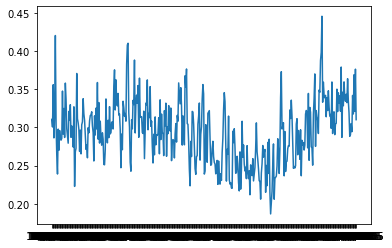

In [8]:
import pandas as pd

data_in = load_comma_data('2004CloudFracData.csv', 1)

date = data_in[:,0]
CloudFrac = data_in[:,1]

#nday = 75 #2012 is a leap year, hence containing 366 days
#datespace = dt.datetime(2004, 1, 1); #Need To Set datespace at the last date of the year
                                     #This is because we will substract down by this date
#date = [datespace - dt.timedelta(days=x) for x in range(0, nday)]

plt.plot(date, CloudFrac)
plt.show()
